In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import zipfile


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-30 18:06:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  54.9MB/s    in 7.2s    

2023-05-30 18:07:01 (68.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/test'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
there are 

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (494, 512, 3)


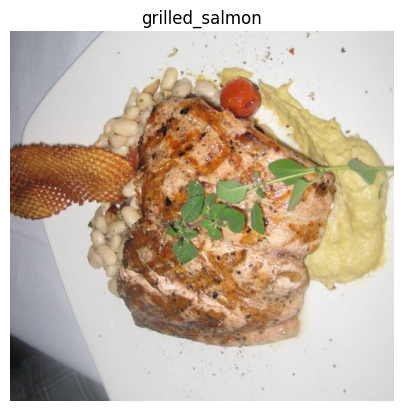

In [8]:
img = view_random_image(train_dir, random.choice(class_names))

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


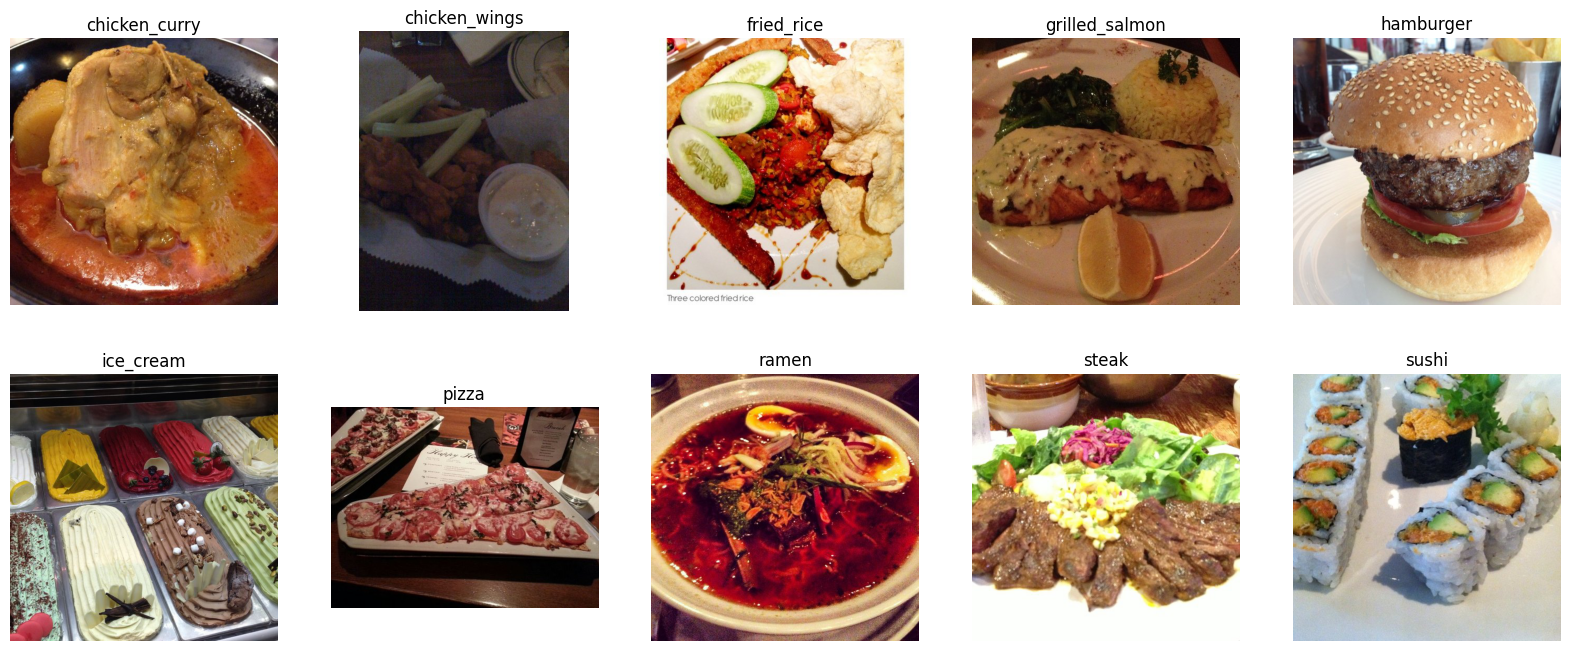

In [9]:
plt.figure(figsize=(20, 8))
for x in range(10):
    plt.subplot(2, 5, x+1)
    img = view_random_image(train_dir, class_names[x])

### Preprocess the data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
train_data = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical",
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Model Creation

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy

In [14]:
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [18]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [19]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 127s 534ms/step - loss: 2.0404 - accuracy: 0.2820 - val_loss: 1.9112 - val_accuracy: 0.3232
Epoch 2/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0003 - accuracy: 0.2945 - val_loss: 1.8410 - val_accuracy: 0.3656
Epoch 3/5
235/235 [==============================] - 119s 505ms/step - loss: 1.9559 - accuracy: 0.3173 - val_loss: 1.9047 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 118s 500ms/step - loss: 1.9270 - accuracy: 0.3357 - val_loss: 1.7654 - val_accuracy: 0.4056
Epoch 5/5
235/235 [==============================] - 116s 493ms/step - loss: 1.9151 - accuracy: 0.3444 - val_loss: 1.7716 - val_accuracy: 0.3952


In [20]:
def plot_history_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

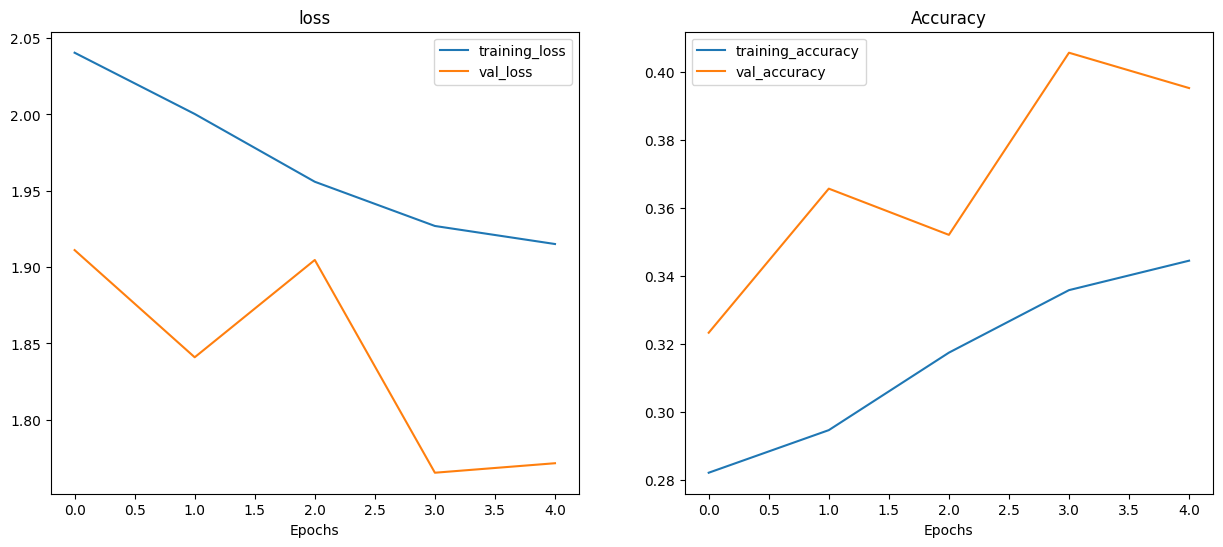

In [21]:
plot_history_curves(history)

In [25]:
def load_and_prep_image(filename, img_shape=224):
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img, channels=3)
    
    img = tf.image.resize(img, size=[img_shape, img_shape])
    
    img = img/255
    
    return img

In [26]:
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [23]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 171ms/step


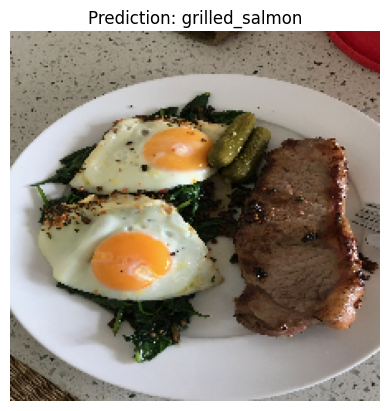

In [27]:
pred_and_plot(model=model, 
              filename="03-steak.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


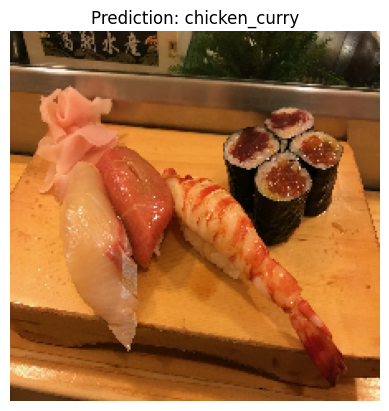

In [29]:
pred_and_plot(model, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


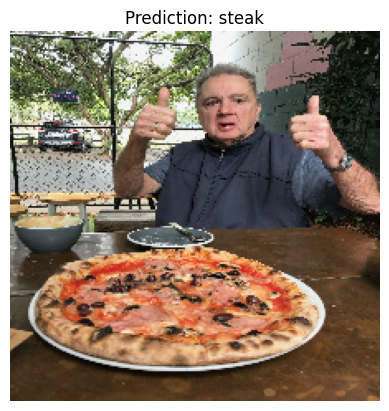

In [31]:
pred_and_plot(model, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


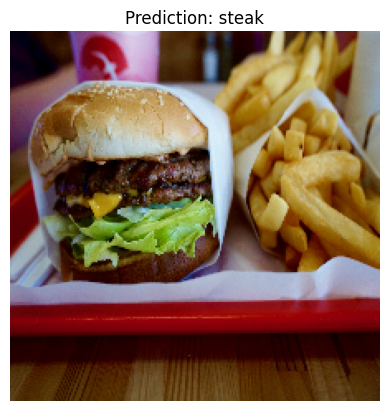

In [32]:
pred_and_plot(model, "03-hamburger.jpeg", class_names)

### Saving our model

In [33]:
model.save("saved_trained_model")

In [34]:
loaded_model = tf.keras.models.load_model("saved_trained_model")
loaded_model.evaluate(test_data)

79/79 [==============================] - 16s 199ms/step - loss: 1.7716 - accuracy: 0.3952


[1.7715712785720825, 0.3952000141143799]

In [35]:
model.evaluate(test_data)

79/79 [==============================] - 12s 149ms/step - loss: 1.7716 - accuracy: 0.3952


[1.7715721130371094, 0.3952000141143799]